# Financial Inclusion in Africa


The data for this project is gotten the "Financial Inclusion in Africa" Competition on Zindi.

###### Tasks:
- Data ingestion
- Exploratory Data Analysis (EDA)
- Data preprocessing
- Train and evaluate a base model
- Improve the model (if necessary)
- Deploy the model in backend server (accessible via a REST API)

In [406]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warning messages (if any)
import warnings
warnings.filterwarnings('ignore')

# Always display plots in this notebook
%matplotlib inline


# Set theme for seaborn plots

# sns.set_style(style = 'whitegrid')
# sns.set_style('darkgrid')
sns.set_theme(style="darkgrid", font_scale=1.3)

## Data ingestion

In [407]:
# Load the dataset
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
variables = pd.read_csv('data/VariableDefinitions.csv', names=["feature", "description"], header=0)
sample_sub = pd.read_csv('data/SampleSubmission.csv')

In [408]:
# See feature description


# variables

# for row in variables.iterrows():
#     print(row[1][0])

for row in variables.itertuples():
    print(f"<*** {row.feature} ***>  \n {row.description}  \n")

<*** country ***>  
 Country interviewee is in.  

<*** year ***>  
 Year survey was done in.  

<*** uniqueid ***>  
 Unique identifier for each interviewee  

<*** location_type ***>  
 Type of location: Rural, Urban  

<*** cellphone_access ***>  
 If interviewee has access to a cellphone: Yes, No  

<*** household_size ***>  
 Number of people living in one house  

<*** age_of_respondent ***>  
 The age of the interviewee  

<*** gender_of_respondent ***>  
 Gender of interviewee: Male, Female  

<*** relationship_with_head ***>  
 The interviewee’s relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know  

<*** marital_status ***>  
 The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don’t know  

<*** education_level ***>  
 Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training,

In [409]:
# See the shape of the datasets
print("Rows & columns in train data", train.shape)
print("Rows & columns in test data", test.shape)

Rows & columns in train data (23524, 13)
Rows & columns in test data (10086, 12)


In [410]:
# Get basic information on the dataset
print(train.info(), '\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100

In [411]:
# View a sample of the dataset
train.sample(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
14443,Rwanda,2016,uniqueid_8376,No,Urban,Yes,7,51,Female,Spouse,Married/Living together,Primary education,Farming and Fishing
18582,Tanzania,2017,uniqueid_3780,No,Urban,No,1,25,Female,Spouse,Single/Never Married,Primary education,Self employed
12095,Rwanda,2016,uniqueid_6028,No,Rural,Yes,6,16,Female,Child,Single/Never Married,Primary education,Dont Know/Refuse to answer
21728,Uganda,2018,uniqueid_306,No,Rural,No,5,35,Female,Spouse,Married/Living together,No formal education,Other Income
10291,Rwanda,2016,uniqueid_4224,No,Rural,Yes,3,50,Female,Head of Household,Widowed,Secondary education,Farming and Fishing


In [412]:
# Check for duplicates
print('Duplicates in train data:', train.duplicated().sum(), '\n')
print('Duplicates in test data:', test.duplicated().sum(), '\n')

Duplicates in train data: 0 

Duplicates in test data: 0 



In [413]:
# Convert the year column to a object(string) datatype
train['year'] = train['year'].astype('object')
test['year'] = test['year'].astype('object')

### Exploratory Data Analysis (EDA)

In [414]:
train.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [415]:
# #  Drop irrelevant column(s)
# data = train.drop(columns=["uniqueid"])

# Use "train" dataset for EDA and Predictive Analytics
data = train

cat_columns = data.select_dtypes(include='object').columns
num_columns = data.select_dtypes(include='number').columns


In [416]:
num_columns

Index(['household_size', 'age_of_respondent'], dtype='object')

In [25]:
# Compute and display stats for categorical features

cat_stats = pd.DataFrame(columns = ['feature', 'unique_values', 'unique_count', 'num_missing', 'pct_missing'])
tmp = pd.DataFrame()

# compute and store column stats in the cats_stats dataframe
for col in cat_columns:
    tmp['feature'] = [col]
    tmp['unique_values'] = [data[col].unique()]
    tmp['unique_count'] = int(data[col].nunique())
    tmp['num_missing'] = data[col].isnull().sum()
    tmp['pct_missing'] = (data[col].isnull().sum() / len(train)).round(3)*100
    
    #  Append new stats row to stats dataframe
    cat_stats = cat_stats.append(tmp)
    
# Sort cat_stats dataframe by the number of unique values(distinct categories) in ascending order
cat_stats.sort_values(by = 'unique_count', inplace = True, ascending = True)

# Set the index to categorical feature(column) names
cat_stats.set_index('feature', inplace = True)


In [26]:
cat_stats

,unique_values,unique_count,num_missing,pct_missing
feature,,,,
bank_account,"[Yes, No]",2,0,0.0
location_type,"[Rural, Urban]",2,0,0.0
cellphone_access,"[Yes, No]",2,0,0.0
gender_of_respondent,"[Female, Male]",2,0,0.0
year,"[2018, 2016, 2017]",3,0,0.0
country,"[Kenya, Rwanda, Tanzania, Uganda]",4,0,0.0
marital_status,"[Married/Living together, Widowed, Single/Neve...",5,0,0.0
relationship_with_head,"[Spouse, Head of Household, Other relative, Ch...",6,0,0.0
education_level,"[Secondary education, No formal education, Voc...",6,0,0.0


###### Numerical features stats

In [23]:
# Compute and display stats for numerical features

# for col in num_columns:
#     num_missing = data[col].isnull().sum()
#     pct_missing = (data[col].isnull().sum() / len(data)).round(3)*100
    
#     print(f"'{col}' column has {pct_missing}% missing values")
    


num_stats = pd.DataFrame(columns = ['feature', 'skew', 'kurtosis', 'num_missing', 'pct_missing'])
tmp = pd.DataFrame()

# compute and store column stats in the cats_stats dataframe
for col in num_columns:
    tmp['feature'] = [col]
    # tmp['unique_values'] = [data[col].unique()]
    tmp['skew'] = data[col].skew()
    tmp['kurtosis'] = data[col].kurtosis()
    tmp['num_missing'] = data[col].isnull().sum()
    tmp['pct_missing'] = (data[col].isnull().sum() / len(train)).round(3)*100
    
    #  Append new stats row to stats dataframe
    num_stats = num_stats.append(tmp)
    
# Sort num_stats dataframe by the number of pct_missing(% of missing values) in ascending order
num_stats.sort_values(by = 'pct_missing', inplace = True, ascending = True)

# Set the index to numerical feature(column) names
num_stats.set_index('feature', inplace = True)

In [24]:
num_stats

,skew,kurtosis,num_missing,pct_missing
feature,,,,
household_size,0.988200,1.313302,0,0.0
age_of_respondent,0.841686,0.100138,0,0.0


In [15]:
# Show statistical summary of numerical variables
data.describe()

,household_size,age_of_respondent
count,23524.000000,23524.000000
mean,3.797483,38.805220
std,2.227613,16.520569
min,1.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


In [16]:
# Show statistical summary of categorical variables
data.describe(include='object')

,country,year,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524,23524,23524,23524,23524,23524,23524,23524,23524
unique,4,3,2,2,2,2,6,5,6,10
top,Rwanda,2016,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,8735,20212,14343,17454,13877,12831,10749,12791,6437


In [355]:
#  Function to plot visualizations for univariate analysis
def univariate_plot(df, hue = None):
    '''
    This funtion will plot visualizations for categorical and continuous features in provided dataframe(df)
    
    Categorical - Count plot
    Continuous  - Distribution & Box plots
    
    df: data in a dataframe
    
    '''
    
    # Get names of the Categorical and Continuous features
    cat_columns = df.select_dtypes(include='object').columns
    num_columns = df.select_dtypes(include='number').columns
    
    
    # Plot visualizations for categorical features
    for col in num_columns:
        fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 5))
        
        ax[0].set_title("Distribution Plot")
#         sns.distplot(df[col], ax=ax[0])
        sns.histplot(x = col, data=df, ax=ax[0])
        
                
        ax[1].set_title("KDE Plot")
        sns.kdeplot(data = df, x=col, ax=ax[1], hue = hue)
        
        ax[2].set_title("Box Plot")
        sns.boxplot(data = df, x=col, ax=ax[2])

    
    fig.tight_layout()  
    plt.show()
    
    # Plot visualizations for numerical features
    for col in cat_columns:
        fig, ax = plt.subplots(figsize=(10, 5))
        
#         ax.set_title("Count Plot")
        sns.countplot(data = df, x=col, hue = hue, ax=ax)
        
        plt.xticks(rotation=45)
    
    fig.tight_layout()  
    plt.show()


    


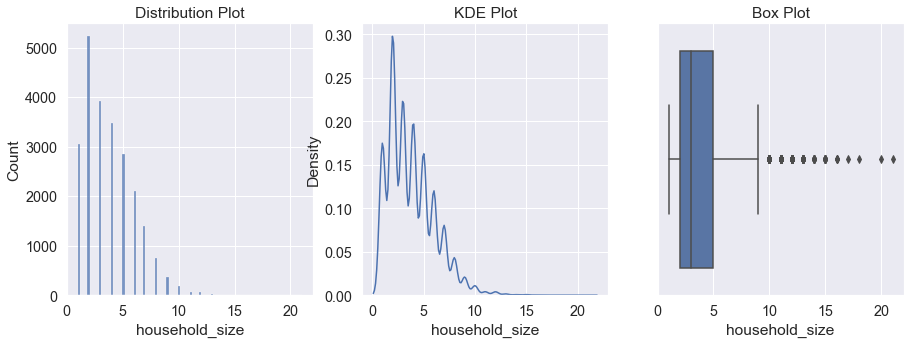

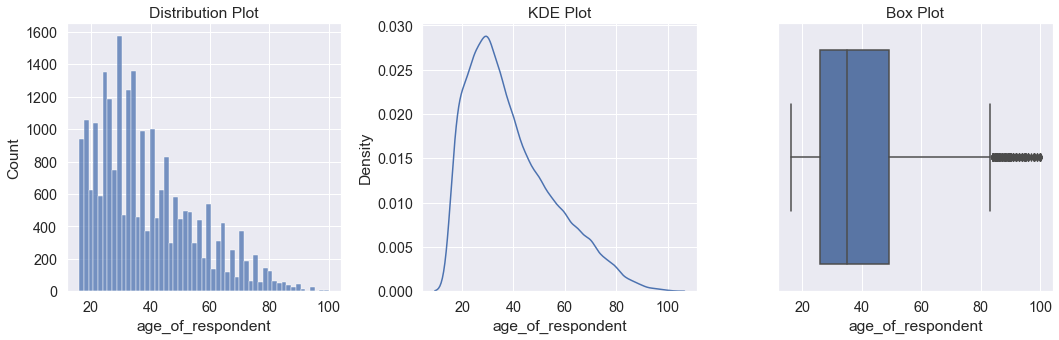

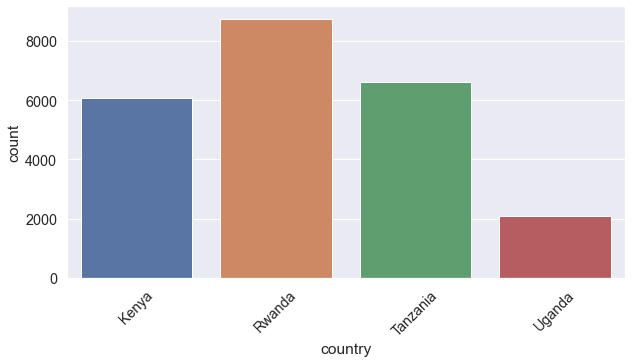

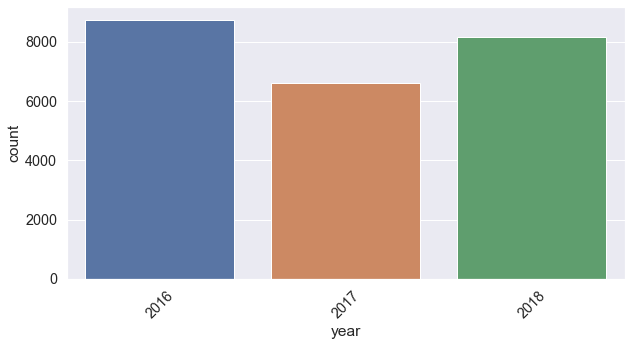

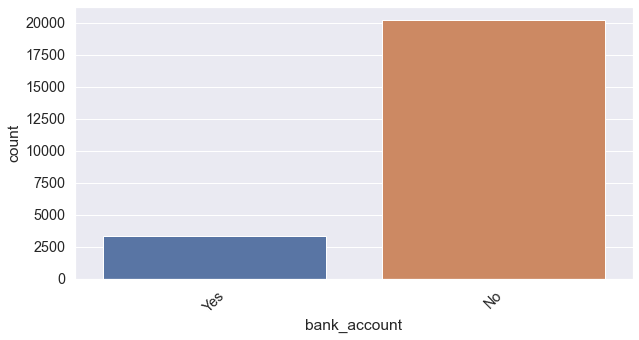

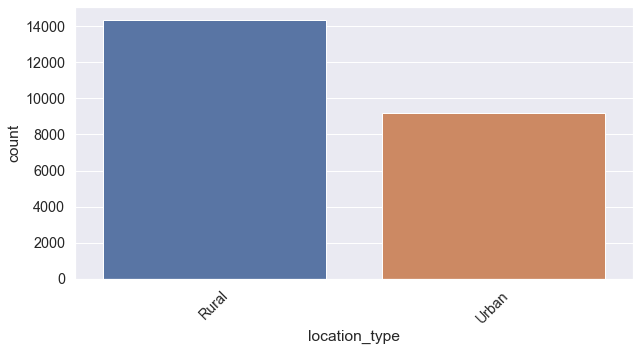

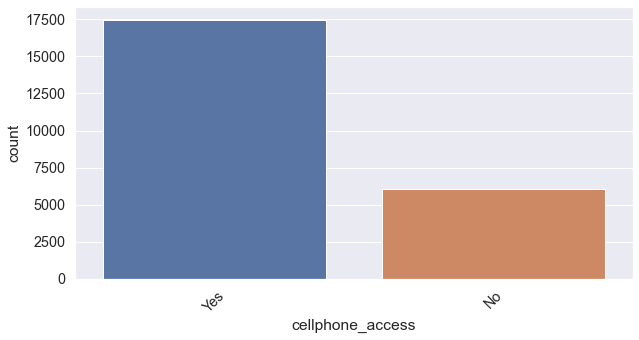

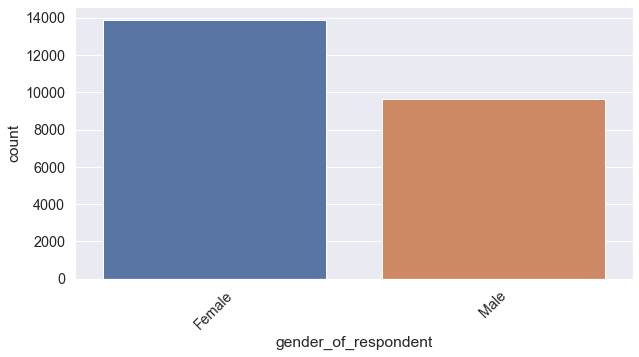

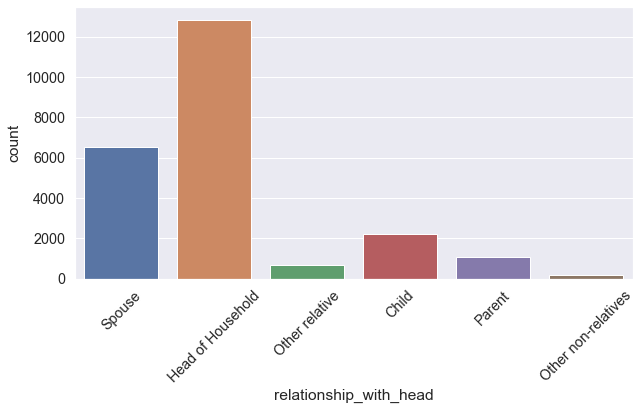

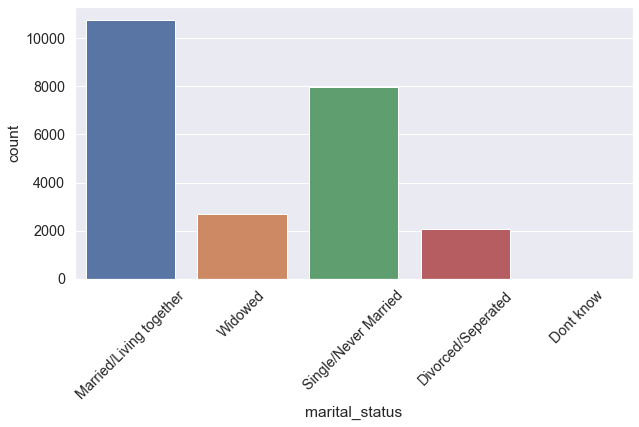

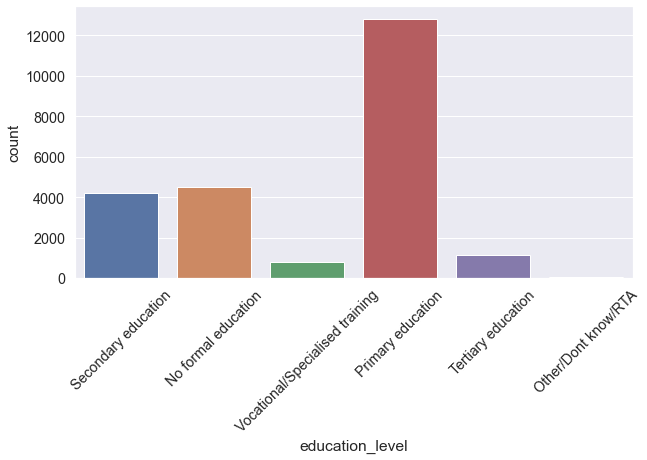

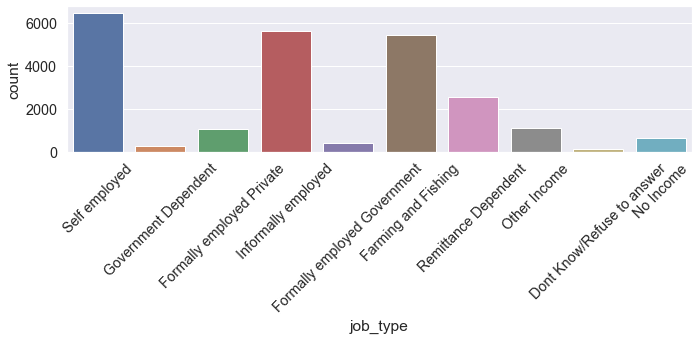

In [45]:
# Univariate Analysis

# univariate_plot(data, hue = 'bank_account')
univariate_plot(data)

#### Initial Observations
There are:
- no missing values in the datasets
- no duplicates 

### Bivariate/Multivariate Analysis

In [27]:
# Import association_metrics  
import association_metrics as am

# from pandas.plotting import scatter_matrix

In [78]:
# Initialize a Cramer's V object using the dataset
cramersv = am.CramersV(data.astype("category")) 

# Get correlation in a pairwise matrix filled with Cramer's V, where columns and index are 
# the categorical variables of the dataset
correlation = cramersv.fit()

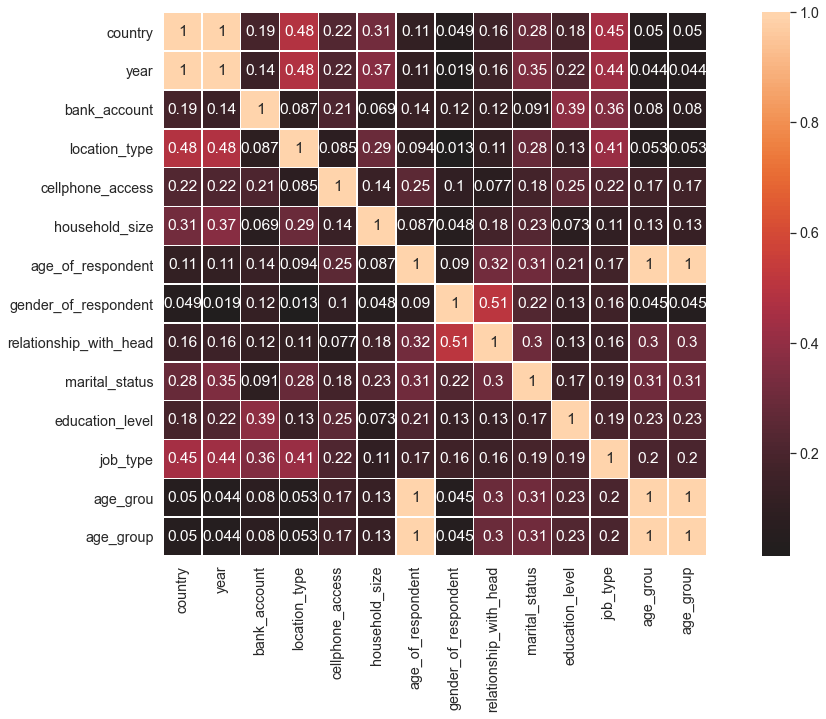

In [80]:
fig,ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlation, vmax=1.0, linewidths=0.5, annot=True, square=True, center=0)
plt.show()

In [76]:
correlation

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_grou,age_group
country,1.000000,1.000000,0.188737,0.483880,0.222506,0.314922,0.110258,0.048606,0.155695,0.284771,0.184668,0.451830,0.050479,0.050479
year,1.000000,1.000000,0.144151,0.478689,0.215851,0.369014,0.110073,0.019064,0.157600,0.346987,0.220311,0.435302,0.044029,0.044029
bank_account,0.188737,0.144151,1.000000,0.087288,0.209669,0.068803,0.139979,0.117234,0.118065,0.090647,0.388423,0.359027,0.080011,0.080011
location_type,0.483880,0.478689,0.087288,1.000000,0.085238,0.293113,0.094288,0.012924,0.109320,0.284760,0.132853,0.414813,0.053055,0.053055
cellphone_access,0.222506,0.215851,0.209669,0.085238,1.000000,0.138969,0.253329,0.102370,0.076703,0.175824,0.254580,0.218612,0.174258,0.174258
household_size,0.314922,0.369014,0.068803,0.293113,0.138969,1.000000,0.087278,0.048235,0.180078,0.229085,0.073361,0.106172,0.131272,0.131272
age_of_respondent,0.110258,0.110073,0.139979,0.094288,0.253329,0.087278,1.000000,0.090105,0.320773,0.311714,0.210423,0.173310,1.000000,1.000000
gender_of_respondent,0.048606,0.019064,0.117234,0.012924,0.102370,0.048235,0.090105,1.000000,0.509241,0.223843,0.125883,0.163461,0.044818,0.044818
relationship_with_head,0.155695,0.157600,0.118065,0.109320,0.076703,0.180078,0.320773,0.509241,1.000000,0.298670,0.126131,0.157311,0.296262,0.296262
marital_status,0.284771,0.346987,0.090647,0.284760,0.175824,0.229085,0.311714,0.223843,0.298670,1.000000,0.165540,0.187357,0.307617,0.307617


In [94]:
data.corr()

,household_size,age_of_respondent
household_size,1.000000,-0.129729
age_of_respondent,-0.129729,1.000000


## Data preprocessing

### Data Cleaning

In [422]:
#  Function to remove duplicates
def remove_outliers(df, exclude = []):
    '''
    This funtion will remove rows with outliers in continuous features from the provided dataframe(df)

    
    df: data in a dataframe
    exclude: list of feature(s) whose outliers should be left
    
    
    '''
    
    # Get names of the Continuous features
    num_columns = df.select_dtypes(include='number').columns
    

    for col in num_columns:
        
        if (exclude != []) & (col in exclude):
            pass
        
        else:
            
            feature = df[col]

            # Compute the first and third quantiles and IQR of the feature
            q1 = np.quantile(feature, 0.25)
            q3 = np.quantile(feature, 0.75)
            iqr = q3 - q1

            # Calculate the lower and upper cutoffs for outliers
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr

            # Subset feature to find outliers
            outliers = feature[(feature < lower) | (feature > upper)]

            print(f"Total outliers for {col} is  {len(outliers)} at {round((len(outliers) / len(df) * 100), 2)}%")
        #     print(outliers.index)

    


In [425]:
remove_outliers(data, exclude = ["age_of_respondent", "household_size"])

### Feature Engineering

In [96]:
data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [97]:
# # Generate age groups from the "age of respondent" feature

# bins = [16,31,49,60,125]
# labels = ["Young Adult","Middle Aged","Old Adult","Elderly"]
# data["age_group"] = pd.cut(data["age_of_respondent"], bins = bins ,labels = labels, right = False)

In [98]:
# Define the input features and target 

# col_to_drop = ['country', 'year', 'uniqueid', 'bank_account']
col_to_drop = ['uniqueid', 'bank_account']

X = data.drop(columns = col_to_drop)
y = data['bank_account']

In [99]:
X.sample(2)

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
5658,Kenya,2018,Rural,Yes,6,41,Female,Spouse,Married/Living together,Tertiary education,Formally employed Government
19896,Tanzania,2017,Rural,Yes,3,41,Female,Spouse,Single/Never Married,Tertiary education,Formally employed Private


### Data Splitting

In [100]:
# Import library
from sklearn.model_selection import train_test_split

In [101]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.30, stratify=y)

### Feature Scaling

In [107]:
# Import necessary libraries

# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [110]:
# Initialize scaler instance
# input_scaler = StandardScaler()
input_scaler = MinMaxScaler() 

# Numerical features(columns) in the dataset
numerical = X.select_dtypes(include="number").columns

num_exists = numerical.empty == False

# Scale numerical features if they exist in dataset
if (num_exists):
    X_train[numerical] = input_scaler.fit_transform(X_train[numerical])
    X_test[numerical] = input_scaler.transform(X_test[numerical])

In [111]:
X_train.sample()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
13355,Rwanda,2016,Urban,Yes,0.15,0.095238,Female,Parent,Single/Never Married,Secondary education,Remittance Dependent


### Feature Encoding

In [112]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

###### Encode input features

In [118]:
# Initialize encoder instance
cat_encoder = OneHotEncoder(dtype=np.int, handle_unknown='ignore', sparse_output=False)

# Categorical features 
# categorical = X.select_dtypes(include="category").columns
categorical = X.select_dtypes(include="object").columns

cat_exists = categorical.empty == False


# Encode categorical features if they exist in dataset
if (cat_exists):
    
    # Encode the categorical features(columns) and generate appropriate column names
    cat_train_df = pd.DataFrame(cat_encoder.fit_transform(X_train[categorical]), index=X_train.index)
    cat_test_df = pd.DataFrame(cat_encoder.transform(X_test[categorical]), index=X_test.index)

    cat_train_df.columns = cat_encoder.get_feature_names_out(categorical)
    cat_test_df.columns = cat_encoder.get_feature_names_out(categorical)
    
    # cat_train_df.columns
    
    # Join the new dataframe to our original data then drop the categorical columns
    X_train = X_train.join(cat_train_df).drop(columns = categorical)
    X_test = X_test.join(cat_test_df).drop(columns = categorical)

In [121]:
# X_train.shape

In [124]:
X_train.sample()

,household_size,age_of_respondent,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,year_2016,year_2017,year_2018,location_type_Rural,...,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
10375,0.05,0.321429,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


###### Encode the target feature

In [125]:
# Initialize encoder instance
target_enc = LabelEncoder()

target_enc.fit(y_train)

y_train = target_enc.transform(y_train)

y_test = target_enc.transform(y_test)

In [128]:
target_enc.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

### Feature Importance

In [129]:
# Import necessary libraries
from sklearn.feature_selection import RFE, SelectKBest, chi2, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

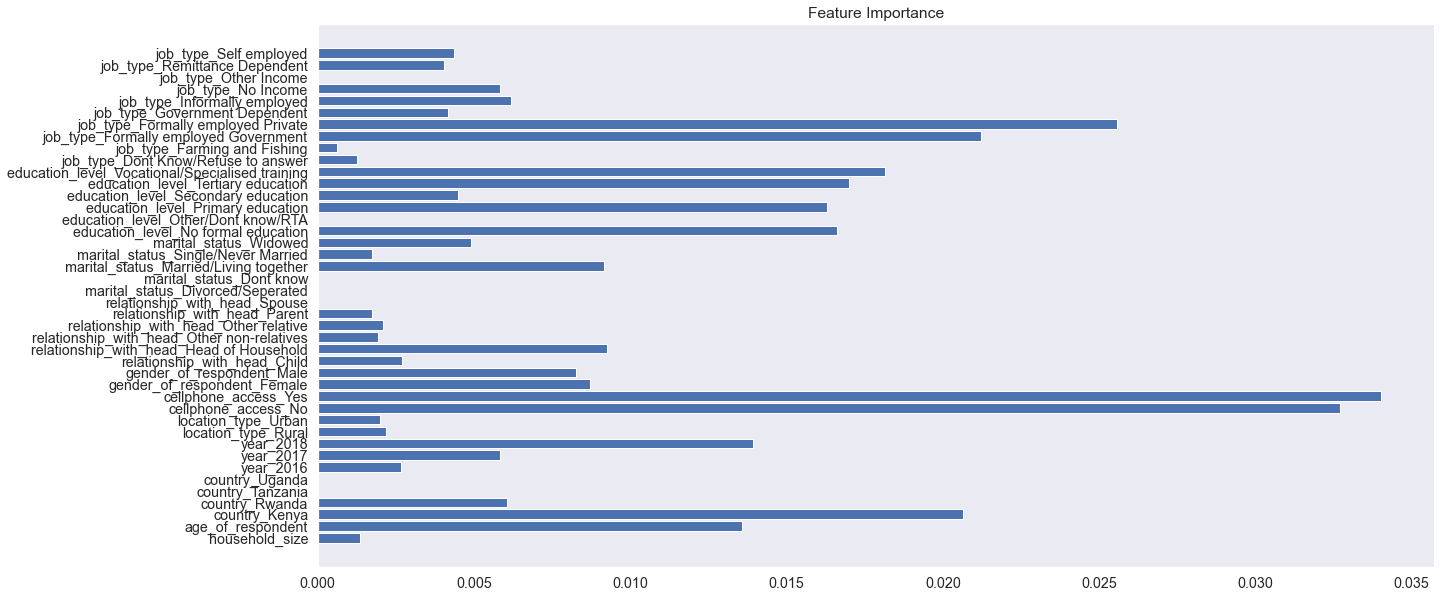

In [135]:
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k=12)
#     fs = SelectKBest(score_func=chi2)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


# What are scores for the features
# for i in range(len(fs.scores_)):
#  print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
plt.figure(figsize=(20, 10))
plt.barh([i for i in range(len(fs.scores_))], fs.scores_)
plt.yticks([i for i in range(len(fs.scores_))], labels=fs.feature_names_in_)
plt.grid(b=None)
plt.title("Feature Importance")
plt.show()

In [228]:
# feat = pd.DataFrame(fs.scores_, index=fs.feature_names_in_)

d = {'Feature' : fs.feature_names_in_, 'Score': fs.scores_}

feat = pd.DataFrame( data = d)

In [347]:
# feat.sort_values(by='Score', ascending=False).head(10).plot.barh()

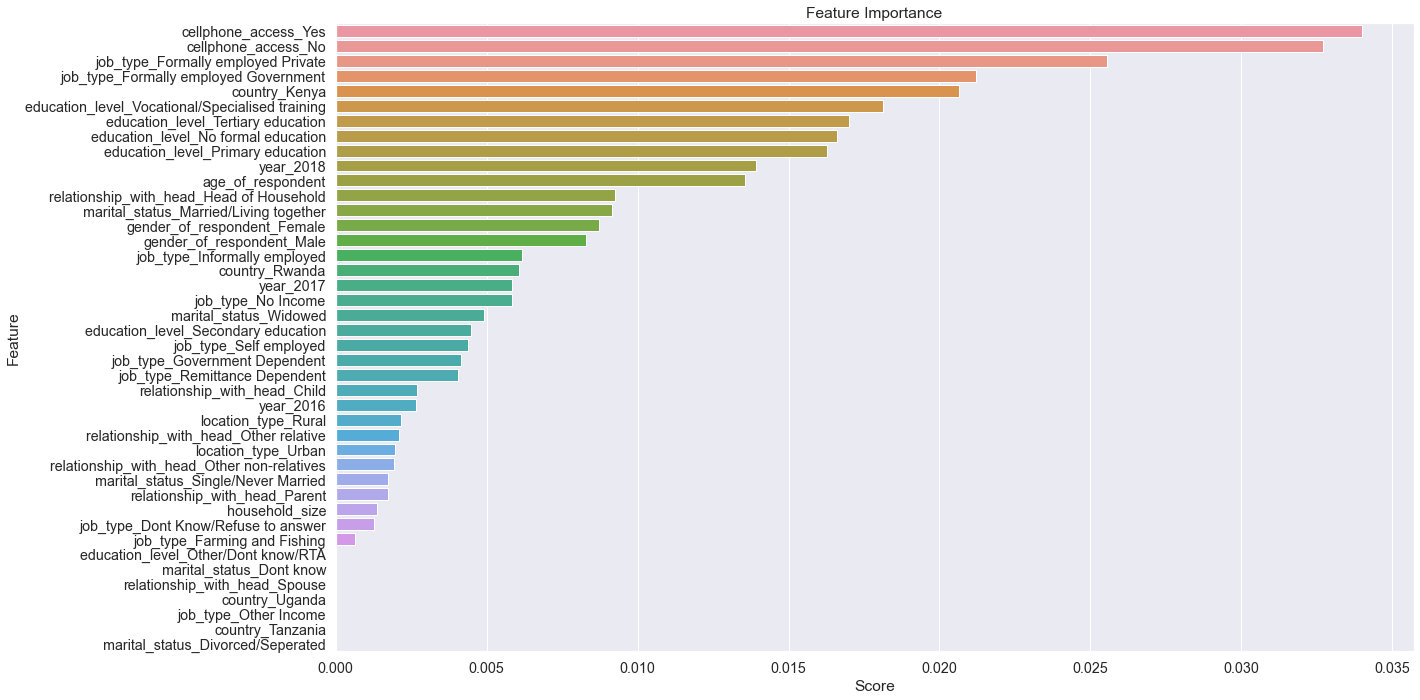

In [232]:
fig, ax = plt.subplots(figsize=(20, 10))
        
ax.set_title("Feature Importance")
sns.barplot(data = feat.sort_values(by='Score', ascending=False), x="Score", y="Feature", ax=ax, orient="h")
    
fig.tight_layout()  
plt.show()

## Train and evaluate a base model

In [326]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay
from sklearn.metrics import mean_absolute_error

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [327]:
# Evaluate model using classification report
def modelEval(model):
    model.fit(X_train, y_train)
#     model.fit(X_train_fs, y_train)

    accuracy = model.score(X_test, y_test)
#     accuracy = model.score(X_test_fs, y_test)
    
    y_pred = model.predict(X_test)
    y_prob_test = model.predict_proba(X_test)[:, 1]
#     y_pred = model.predict(X_test_fs)
#     y_prob_test = model.predict_proba(X_test_fs)[:, 1]
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob_test > 0.4)
    
    df = pd.DataFrame({
        'Precision': precision, 
        'Recall' : recall
#         'Thresholds' : thresholds + [0]
    })
#     print(df.head(5))

    
    print("*** MODEL EVALUATION REPORT *** \n")
    print("AUC_ROC Score", roc_auc_score(y_test, y_prob_test))
    print("F1 Score", f1_score(y_test, y_pred))
    print("MAE", mean_absolute_error(y_test, y_pred))
    print("Mean Accuracy: ", accuracy)
    print(classification_report(y_test, y_pred))
    print('\n')

    # Plot the Precision-Recall Curve
    display = PrecisionRecallDisplay.from_estimator(model, X_test, y_test, name="Avg Precision", )
#     display = PrecisionRecallDisplay.from_estimator(model, X_test_fs, y_test, name="Avg Precision", )
    _ = display.ax_.set_title("Precision-Recall curve")
    plt.show()
    
    # Plot the Precision-Recall Curve
#     plt.fill_between(recall, precision)
#     plt.ylabel("Precision")
#     plt.xlabel("Recall")
#     plt.title("Precision-Recall curve")
#     plt.show()
                          
    # Display the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    
    cm_display.plot()
    plt.title("Confusion Matrix")
    plt.show()
    
    print('\n')

In [328]:
# Base models for experiment
models = [
    RandomForestClassifier(random_state=42),
#     DecisionTreeClassifier(random_state=42),
    LogisticRegression(random_state=42),
#     GaussianNB(),
    XGBClassifier(random_state=42),
#     KNeighborsClassifier()
]

*** MODEL EVALUATION REPORT *** 

AUC_ROC Score 0.8149780941586192
F1 Score 0.4759682687820812
MAE 0.1591102295267781
Mean Accuracy:  0.8408897704732219
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      6064
           1       0.44      0.51      0.48       994

    accuracy                           0.84      7058
   macro avg       0.68      0.70      0.69      7058
weighted avg       0.85      0.84      0.85      7058





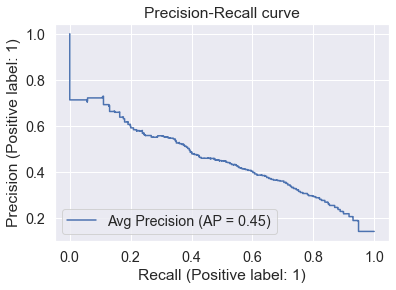

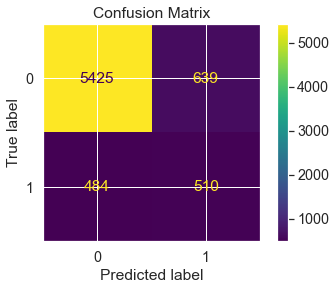



*** MODEL EVALUATION REPORT *** 

AUC_ROC Score 0.8469282051145925
F1 Score 0.5115913555992141
MAE 0.17611221309152736
Mean Accuracy:  0.8238877869084726
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      6064
           1       0.42      0.65      0.51       994

    accuracy                           0.82      7058
   macro avg       0.68      0.75      0.70      7058
weighted avg       0.86      0.82      0.84      7058





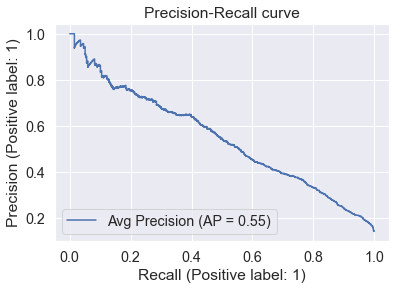

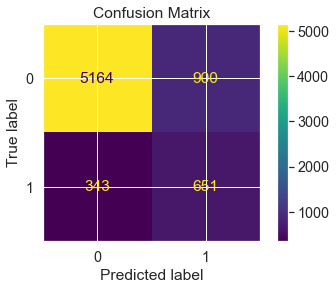



[18:01:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
*** MODEL EVALUATION REPORT *** 

AUC_ROC Score 0.8495436670152843
F1 Score 0.5109489051094891
MAE 0.12340606404080476
Mean Accuracy:  0.8765939359591952
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      6064
           1       0.58      0.46      0.51       994

    accuracy                           0.88      7058
   macro avg       0.75      0.70      0.72      7058
weighted avg       0.87      0.88      0.87      7058





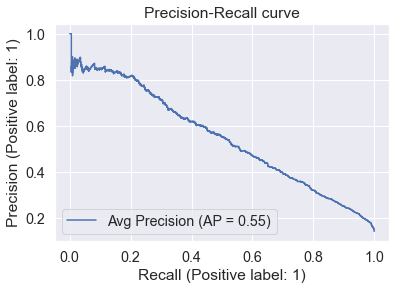

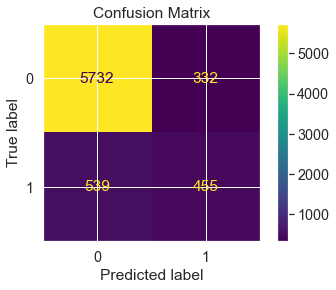

In [329]:
for model in models:
    modelEval(model)

In [ ]:
   Precision    Recall
0   0.140833  1.000000
1   0.465753  0.478873
2   1.000000  0.000000
*** MODEL EVALUATION REPORT *** 

AUC_ROC Score 0.814269356242999
F1 Score 0.4513574660633484
Mean Accuracy:  0.8625672995182772
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      6064
           1       0.52      0.40      0.45       994

    accuracy                           0.86      7058
   macro avg       0.71      0.67      0.69      7058
weighted avg       0.85      0.86      0.86      7058







   Precision    Recall
0   0.140833  1.000000
1   0.415027  0.466801
2   1.000000  0.000000
*** MODEL EVALUATION REPORT *** 

AUC_ROC Score 0.6797363999299225
F1 Score 0.4382191095547774
Mean Accuracy:  0.8408897704732219
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      6064
           1       0.44      0.44      0.44       994

    accuracy                           0.84      7058
   macro avg       0.67      0.67      0.67      7058
weighted avg       0.84      0.84      0.84      7058







   Precision    Recall
0   0.140833  1.000000
1   0.615932  0.435614
2   1.000000  0.000000
*** MODEL EVALUATION REPORT *** 

AUC_ROC Score 0.8571566270976783
F1 Score 0.46421404682274253
Mean Accuracy:  0.8865117597052989
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      6064
           1       0.69      0.35      0.46       994

    accuracy                           0.89      7058
   macro avg       0.80      0.66      0.70      7058
weighted avg       0.87      0.89      0.87      7058







   Precision    Recall
0   0.140833  1.000000
1   0.446377  0.619718
2   1.000000  0.000000
*** MODEL EVALUATION REPORT *** 

AUC_ROC Score 0.8354059880390522
F1 Score 0.5238508239375542
Mean Accuracy:  0.8444318503825446
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      6064
           1       0.46      0.61      0.52       994

    accuracy                           0.84      7058
   macro avg       0.70      0.75      0.72      7058
weighted avg       0.87      0.84      0.85      7058







[08:02:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
   Precision    Recall
0   0.140833  1.000000
1   0.598718  0.469819
2   1.000000  0.000000
*** MODEL EVALUATION REPORT *** 

AUC_ROC Score 0.859795066573584
F1 Score 0.4867924528301887
Mean Accuracy:  0.8843865117597053
              precision    recall  f1-score   support

           0       0.91      0.97      0.93      6064
           1       0.65      0.39      0.49       994

    accuracy                           0.88      7058
   macro avg       0.78      0.68      0.71      7058
weighted avg       0.87      0.88      0.87      7058







   Precision    Recall
0   0.140833  1.000000
1   0.589506  0.384306
2   1.000000  0.000000
*** MODEL EVALUATION REPORT *** 

AUC_ROC Score 0.7933259185721188
F1 Score 0.46528623629719856
Mean Accuracy:  0.8756021535845848
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6064
           1       0.59      0.38      0.47       994

    accuracy                           0.88      7058
   macro avg       0.75      0.67      0.70      7058
weighted avg       0.86      0.88      0.86      7058


## Improve the model (if necessary)


In [187]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# from sklearn.linear_model import SGDClassifier

import scipy.stats as stats
from sklearn.utils.fixes import loguniform


# import packages for random oversampling training data
# from numpy import mean

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek

In [215]:
# Create an oversampler for the minority class

# over_sampler = RandomOverSampler( random_state=42)
# over_sampler = SMOTETomek(random_state=42)
over_sampler = SMOTE(sampling_strategy='minority', random_state=42)

# # fit and apply the transform
X_train, y_train = over_sampler.fit_resample(X_train, y_train)

In [220]:
pd.Series(y_over).value_counts()

1    14148
0    14148
dtype: int64

In [219]:
pd.Series(y_train).value_counts()

1    14148
0    14148
dtype: int64

In [205]:
# # define pipeline
# steps = [('over', over_sampler), ('model', RandomForestClassifier())]
# imb_pipeline = Pipeline(steps=steps)

# # define evaluation
# # cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# # evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# scores = cross_val_score(imb_pipeline, X=X_train, y=y_train, scoring='f1', cv=cv, n_jobs=-1)
# score = np.mean(scores)
# print('F1 Score: %.3f' % score)

F1 Score: 0.468


In [206]:
def tuneModel(model, params):

    # Define evaluation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

    # Define search
    # clf = RandomizedSearchCV(n_iter=20, scoring='f1_micro')
    clf = RandomizedSearchCV(estimator = model, param_distributions = params, scoring='f1', cv = cv,  n_jobs=-1)

    # Execute search for best hyperparameter combination
    result = clf.fit(X_train, y_train)

    # Summarize result
    print (f'Train Accuracy - : {result.score(X_train, y_train):.3f}')
    print (f'Test Accuracy - : {result.score(X_test, y_test):.3f}', '\n' )
    
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

In [207]:
clf = RandomForestClassifier()

# Define the parameter distributions
clf_params = {
    'model__n_estimators': [int(x) for x in np.linspace(start = 2, stop = 20)],
#     'model__max_features': ['sqrt', 'log2', None],
    'model__max_depth': [int(x) for x in np.linspace(start = 1, stop = 10)],
    'model__bootstrap': [True, False]
}

# Define pipeline
steps = [('over', over_sampler), ('model', clf)]
clf_pipeline = Pipeline(steps=steps)

# Find best classifier parameters
tuneModel(clf_pipeline, clf_params)

Train Accuracy - : 0.501
Test Accuracy - : 0.483 

Best Score: 0.49299472489769186
Best Hyperparameters: {'model__n_estimators': 17, 'model__max_depth': 8, 'model__bootstrap': True}


In [331]:
Train Accuracy - : 0.501
Test Accuracy - : 0.483 

Best Score: 0.49299472489769186
Best Hyperparameters: {'model__n_estimators': 17, 'model__max_depth': 20, 'model__bootstrap': True}

SyntaxError: invalid syntax (<ipython-input-331-debcb1131b65>, line 1)

*** MODEL EVALUATION REPORT *** 

AUC_ROC Score 0.8138925074191853
F1 Score 0.4723384472338447
MAE 0.16081042788325306
Mean Accuracy:  0.8391895721167469
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      6064
           1       0.44      0.51      0.47       994

    accuracy                           0.84      7058
   macro avg       0.68      0.70      0.69      7058
weighted avg       0.85      0.84      0.84      7058





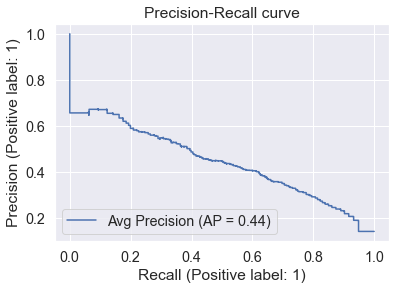

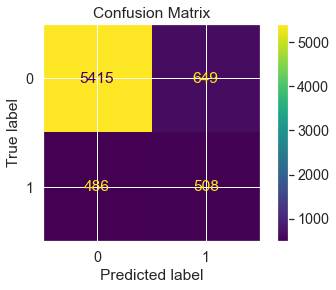

In [334]:
# rf_model = RandomForestClassifier(n_estimators=17, max_depth=8, bootstrap= False, random_state=42)
rf_model = RandomForestClassifier()


modelEval(rf_model)

## Deploy the model in backend server (accessible via a REST API)

## Make competition submission

In [239]:
data = test.drop(columns = ["uniqueid"])

In [241]:
# Scale numerical features if they exist in dataset
data[numerical] = input_scaler.fit_transform(data[numerical])

# Encode the categorical features(columns) and generate appropriate column names
cat_df = pd.DataFrame(cat_encoder.fit_transform(data[categorical]), index=data.index)

cat_df.columns = cat_encoder.get_feature_names_out(categorical)

# Join the new dataframe to our original data then drop the categorical columns
data = data.join(cat_df).drop(columns = categorical)

In [320]:
# model = LogisticRegression(random_state=42)
# model = RandomForestClassifier(random_state=42)
model = XGBClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(data)

[13:28:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [321]:
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [322]:
# sample_sub.sample()

In [323]:
d = {'unique_id': test["uniqueid"] + " x " + test["country"], 'bank_account': y_pred}

In [324]:
submission = pd.DataFrame(data = d)

In [325]:
# submission.to_csv('LR_sub.csv', index= False)
# submission.to_csv('RF_sub.csv', index= False)
submission.to_csv('XGB_sub.csv', index= False)

In [312]:
# test[(test['uniqueid'] == 'uniqueid_8103') & (test['country'] == 'Kenya')]